In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np
import ast
import warnings 
warnings.filterwarnings('ignore') 


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Reading Data

In [93]:
df1 = pd.read_csv(r"C:\Users\MutukunduNandaKumarR\Desktop\Final_Project\Data_Science\timesheet.csv")

### Shape of the data

In [94]:
df1.shape

(6001, 9)

### Checking Null Values

In [95]:
df1.isnull().sum()

_id                 0
startDate           0
endDate             0
userName            0
userEmail           0
Comment             0
totalHoursPerDay    0
totalHours          0
activities          0
dtype: int64

In [96]:
df1.head()

,_id,startDate,endDate,userName,userEmail,Comment,totalHoursPerDay,totalHours,activities
0,4C087EDad6E13d59EeB8AEFB,11/04/2024,17/04/2024,Sherye Gellan,sgellan0@wikipedia.org,Average,"[10, 5, 8, 7, 8, 7, 5]",50,BAU Activity
1,AAA29F5Afed37aEB309b6cbf,10/04/2024,16/04/2024,Pincus Govan,pgovan1@ow.ly,Excellent,"[4, 9, 5, 5, 1, 0, 10]",34,BAU Activity
2,a4aFe2e9eEBa1Fa7EBE9EcdC,10/04/2024,16/04/2024,Mitchel McIndoe,mmcindoe2@umn.edu,Excellent,"[6, 8, 10, 1, 9, 5, 9]",48,Sales Activity
3,aF781fDdCeaBb33ef00fBabe,09/04/2024,15/04/2024,Cornie Kendal,ckendal3@ucsd.edu,Very Poor,"[5, 2, 7, 1, 7, 0, 10]",32,Sales Activity
4,cC1ACD9afcdEA25BcC9aca4D,13/04/2024,19/04/2024,Rancell Phillipps,rphillipps4@rediff.com,Good,"[7, 5, 8, 2, 10, 10, 0]",42,BAU Activity


### Univariate Analysis

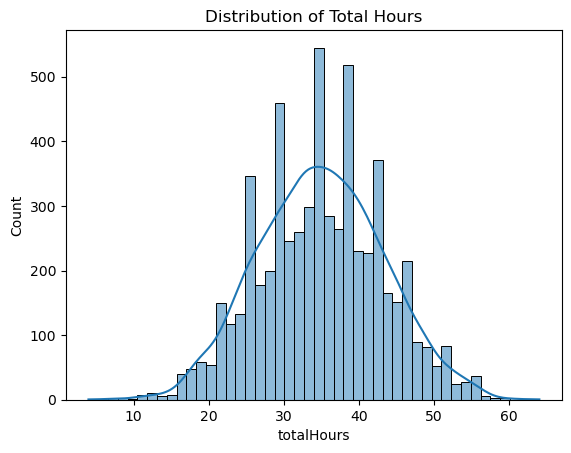

In [97]:
sns.histplot(df1['totalHours'], kde=True)
plt.title('Distribution of Total Hours')
plt.show()


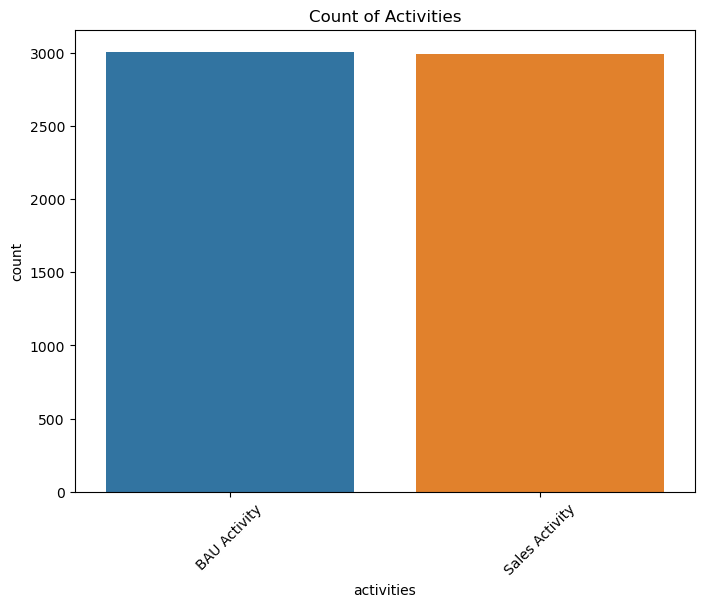

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(x='activities', data=df1)
plt.title('Count of Activities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Bivariate Analysis

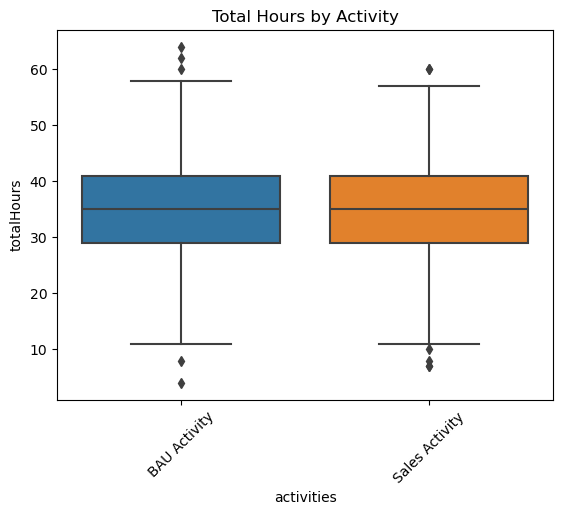

In [99]:
sns.boxplot(data=df1, x='activities', y='totalHours')
plt.title('Total Hours by Activity')
plt.xticks(rotation=45)
plt.show()

In [100]:
df1.head()

,_id,startDate,endDate,userName,userEmail,Comment,totalHoursPerDay,totalHours,activities
0,4C087EDad6E13d59EeB8AEFB,11/04/2024,17/04/2024,Sherye Gellan,sgellan0@wikipedia.org,Average,"[10, 5, 8, 7, 8, 7, 5]",50,BAU Activity
1,AAA29F5Afed37aEB309b6cbf,10/04/2024,16/04/2024,Pincus Govan,pgovan1@ow.ly,Excellent,"[4, 9, 5, 5, 1, 0, 10]",34,BAU Activity
2,a4aFe2e9eEBa1Fa7EBE9EcdC,10/04/2024,16/04/2024,Mitchel McIndoe,mmcindoe2@umn.edu,Excellent,"[6, 8, 10, 1, 9, 5, 9]",48,Sales Activity
3,aF781fDdCeaBb33ef00fBabe,09/04/2024,15/04/2024,Cornie Kendal,ckendal3@ucsd.edu,Very Poor,"[5, 2, 7, 1, 7, 0, 10]",32,Sales Activity
4,cC1ACD9afcdEA25BcC9aca4D,13/04/2024,19/04/2024,Rancell Phillipps,rphillipps4@rediff.com,Good,"[7, 5, 8, 2, 10, 10, 0]",42,BAU Activity


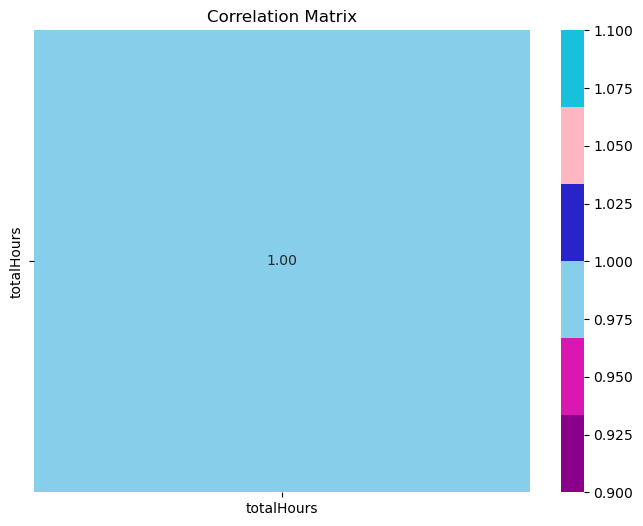

In [101]:
# df1['totalHoursPerDay'] = df1['totalHoursPerDay'].apply(lambda x: sum(map(int, x.strip('[]').split(','))))

numeric_df = df1.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Set custom colors for the heatmap
colors = ["#8B008B", "#DB17B1", "#87CEEB", "#2924C9", "#FFB6C1", "#17C1DB"]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(colors), fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

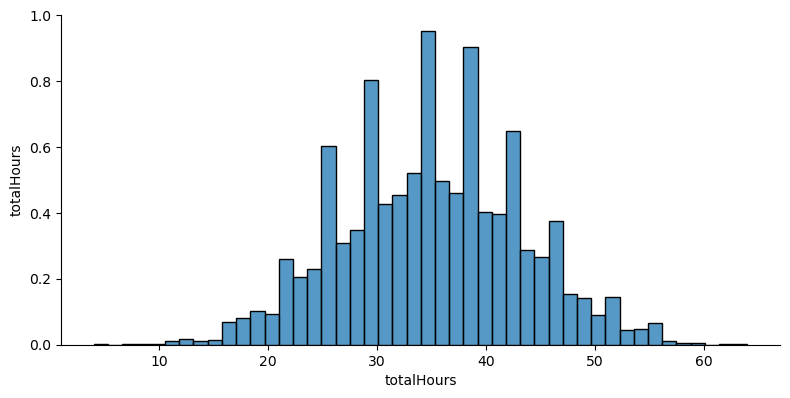

In [102]:
sns.pairplot(df1[['totalHours', 'totalHoursPerDay']], height=4, aspect=2)
plt.show()

In [103]:
df1.head()

,_id,startDate,endDate,userName,userEmail,Comment,totalHoursPerDay,totalHours,activities
0,4C087EDad6E13d59EeB8AEFB,11/04/2024,17/04/2024,Sherye Gellan,sgellan0@wikipedia.org,Average,"[10, 5, 8, 7, 8, 7, 5]",50,BAU Activity
1,AAA29F5Afed37aEB309b6cbf,10/04/2024,16/04/2024,Pincus Govan,pgovan1@ow.ly,Excellent,"[4, 9, 5, 5, 1, 0, 10]",34,BAU Activity
2,a4aFe2e9eEBa1Fa7EBE9EcdC,10/04/2024,16/04/2024,Mitchel McIndoe,mmcindoe2@umn.edu,Excellent,"[6, 8, 10, 1, 9, 5, 9]",48,Sales Activity
3,aF781fDdCeaBb33ef00fBabe,09/04/2024,15/04/2024,Cornie Kendal,ckendal3@ucsd.edu,Very Poor,"[5, 2, 7, 1, 7, 0, 10]",32,Sales Activity
4,cC1ACD9afcdEA25BcC9aca4D,13/04/2024,19/04/2024,Rancell Phillipps,rphillipps4@rediff.com,Good,"[7, 5, 8, 2, 10, 10, 0]",42,BAU Activity


In [104]:
print(df1.columns)

Index(['_id', 'startDate', 'endDate', 'userName', 'userEmail', 'Comment',
       'totalHoursPerDay', 'totalHours', 'activities'],
      dtype='object')


### Model Development

In [105]:

# Train Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")


Mean Squared Error (Random Forest): 0.021316057688041356


### Model for <40 hours

In [106]:

df1['startDate'] = pd.to_datetime(df1['startDate'], format='%d/%m/%Y')
df1['endDate'] = pd.to_datetime(df1['endDate'], format='%d/%m/%Y')

# Calculate total hours for each period
df1['totalHoursPeriod'] = (df1['endDate'] - df1['startDate']).dt.days + 1  # Add 1 to include both start and end dates

# Define features and target variable
X = df1[['totalHoursPeriod']]
y = (df1['totalHours'] < 40).astype(int)  # Convert to binary label (0 or 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       342
           1       0.72      1.00      0.83       859

    accuracy                           0.72      1201
   macro avg       0.36      0.50      0.42      1201
weighted avg       0.51      0.72      0.60      1201



In [107]:
df1['startDate'] = pd.to_datetime(df1['startDate'], format='%d/%m/%Y')
df1['endDate'] = pd.to_datetime(df1['endDate'], format='%d/%m/%Y')

# Calculate total hours for each period
df1['totalHoursPeriod'] = (df1['endDate'] - df1['startDate']).dt.days + 1  # Add 1 to include both start and end dates

# Define features and target variable
X = df1[['totalHoursPeriod']]
y = (df1['totalHours'] < 40).astype(int)  # Convert to binary label (0 or 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       342
           1       0.72      1.00      0.83       859

    accuracy                           0.72      1201
   macro avg       0.36      0.50      0.42      1201
weighted avg       0.51      0.72      0.60      1201



In [108]:
# Convert date columns to datetime
df1['startDate'] = pd.to_datetime(df1['startDate'], format='%d/%m/%Y')
df1['endDate'] = pd.to_datetime(df1['endDate'], format='%d/%m/%Y')

# Calculate total hours for each period
df1['totalHoursPeriod'] = (df1['endDate'] - df1['startDate']).dt.days + 1  # Add 1 to include both start and end dates

# Define features and target variable
X = df1[['totalHoursPeriod']]
y = (df1['totalHours'] > 50).astype(int)  # Convert to binary label (0 or 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")

# Classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.98

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1175
           1       0.00      0.00      0.00        26

    accuracy                           0.98      1201
   macro avg       0.49      0.50      0.49      1201
weighted avg       0.96      0.98      0.97      1201

